In [219]:
import coursework as cw
import numpy as np
from tqdm import tqdm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.sparse import csgraph
import scipy.stats.stats as st
from tqdm import tqdm
from collections import Counter
import math
import networkx as nx
from numpy import linalg as LA
from importlib import reload
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Experiment 1

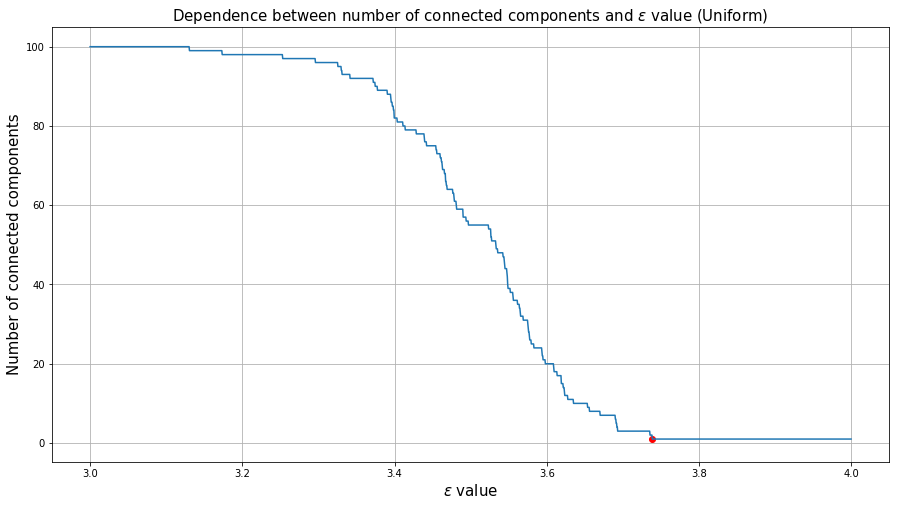

3.7385000000002466

In [881]:
reload(cw)
cw.Exp1(100, 100, 1, 3, 4, 2000, 'Uniform', True, True)

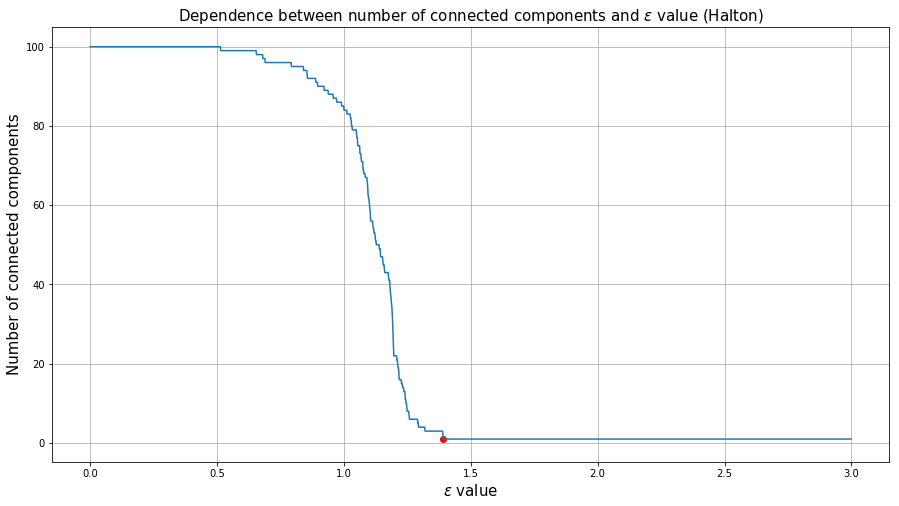

1.3920000000000001

In [882]:
reload(cw)
cw.Exp1(100, 100, 1, 0, 3, 2000, 'Halton', True, True)

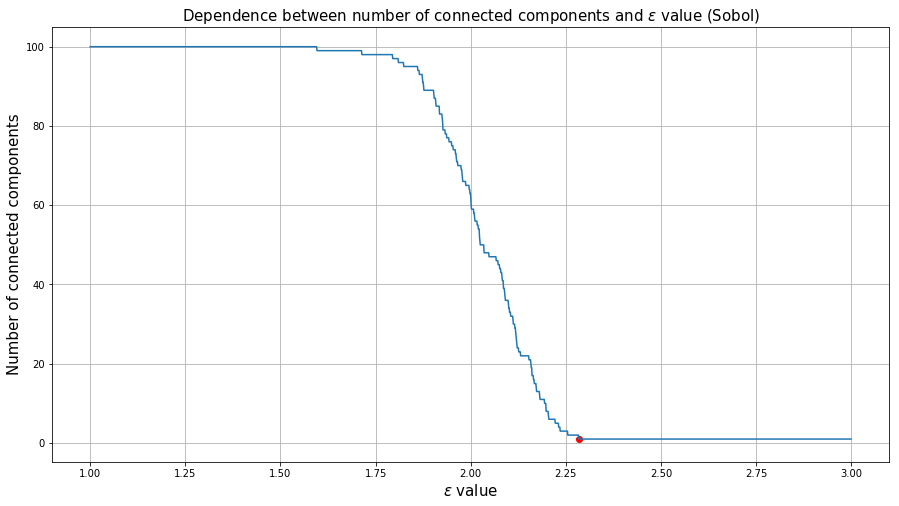

2.2839999999998586

In [883]:
reload(cw)
reload(sl)
cw.Exp1(40, 100, 1, 1, 3, 2000, 'Sobol', True, True)

# Uniform

### n = 100, k = 100, a = 1

In [752]:
reload(cw)
epsilons = np.array([])

for i in tqdm(range(500)):
    epsilons = np.append(epsilons, (cw.Exp1(100, 100, 1, 3.6, 4, 1000, 'Uniform', False, False)))

epsilons = epsilons[epsilons != None]
mean_uni = np.mean(epsilons)
std_uni = np.std(epsilons)
var_uni = np.var(epsilons)
print('mean_uni =', mean_uni)
print('Standart deviation =', std_uni)
print('Variance =', var_uni)

100%|████████████████████████████████████████| 500/500 [19:49<00:00,  2.38s/it]


mean_uni = 3.8040599999999776
Standart deviation = 0.050410404481609154
Variance = 0.00254120887999944


### n = 200, k = 100, a = 1

In [845]:
reload(cw)
epsilons2 = np.array([])

for i in tqdm(range(500)):
    epsilons2 = np.append(epsilons2, (cw.Exp1(200, 100, 1, 5.4, 5.6, 1000, 'Uniform', False, False)))

epsilons2 = epsilons2[epsilons2 != None]
mean2 = np.mean(epsilons2)
std2 = np.std(epsilons2)
var2 = np.var(epsilons2)
print('Mean =', mean2)
print('Standart deviation =', std2)
print('Variance =', var2)

100%|████████████████████████████████████████| 500/500 [20:36<00:00,  2.47s/it]


Mean = 5.496944855967278
Standart deviation = 0.04301033951066249
Variance = 0.001849889304822455


### n = 200, k = 100, a = 3

In [847]:
reload(cw)
epsilons3 = np.array([])

for i in tqdm(range(500)):
    epsilons3 = np.append(epsilons3, (cw.Exp1(200, 100, 3, 16, 17, 1000, 'Uniform', False, False)))
    
epsilons3 = epsilons3[epsilons3 != None]
mean3 = np.mean(epsilons3)
std3 = np.std(epsilons3)
var3 = np.var(epsilons3)
print('Mean =', mean3)
print('Standart deviation =', std3)
print('Variance =', var3)

100%|████████████████████████████████████████| 500/500 [19:25<00:00,  2.33s/it]


Mean = 16.499427710843985
Standart deviation = 0.14123544028891505
Variance = 0.019947449593603686


In [848]:
print('Ratio of mean epsilon value to the length of diagonal:')
print('First set of parameters:', mean_uni / (1 * math.sqrt(100)))
print('Second set of parameters:', mean2 / (1 * math.sqrt(200)))
print('Third set of parameters:', mean3 / (3 * math.sqrt(200)))

Ratio of mean epsilon value to the length of diagonal:
First set of parameters: 0.38040599999999775
Second set of parameters: 0.3886926983462972
Third set of parameters: 0.3888952406678339


## Halton

### n = 100, k = 100, a = 1

In [1116]:
reload(cw)

mean_hal = cw.Exp1(100, 100, 1, 1.2, 1.6, 1000, 'Halton', False, False)
print('Mean =', mean_hal)

Mean = 1.391199999999979


### n = 200, k = 100, a = 1

In [1119]:
reload(cw)

mean2_hal = cw.Exp1(600, 100, 1, 1.2, 1.6, 1000, 'Halton', False, False)
print('Mean =', mean2_hal)

Mean = 1.391199999999979


### n = 200, k = 100, a = 3

In [907]:
reload(cw)

mean3_hal = cw.Exp1(200, 100, 3, 4, 4.4, 1000, 'Halton', False, False)
print('Mean =', mean3_hal)

Mean = 4.173599999999981


In [908]:
print('Ratio of mean epsilon value to the length of diagonal:')
print('First set of parameters:', mean_hal / (1 * math.sqrt(100)))
print('Second set of parameters:', mean2_hal / (1 * math.sqrt(200)))
print('Third set of parameters:', mean3_hal / (3 * math.sqrt(200)))

Ratio of mean epsilon value to the length of diagonal:
First set of parameters: 0.13911999999999788
Second set of parameters: 0.098372695398671
Third set of parameters: 0.09837269539867204


## Sobol

### n = 20, k = 100, a = 1

In [862]:
reload(cw)
reload(sl)
epsilons_sob = np.array([])

for i in tqdm(range(500)):
    epsilons_sob = np.append(epsilons_sob, (cw.Exp1(20, 100, 1, 1.3, 1.7, 1000, 'Sobol', False, False)))

epsilons_sob = epsilons_sob[epsilons_sob != None]
mean_sob = np.mean(epsilons_sob)
std_sob = np.std(epsilons_sob)
var_sob = np.var(epsilons_sob)
print('Mean =', mean_sob)
print('Standart deviation =', std_sob)
print('Variance =', var_sob)

100%|████████████████████████████████████████| 500/500 [19:46<00:00,  2.37s/it]


Mean = 1.5254719999999753
Standart deviation = 0.04018778640332961
Variance = 0.001615058175999644


### n = 40, k = 100, a = 1

In [863]:
reload(cw)
reload(sl)
epsilons2_sob = np.array([])

for i in tqdm(range(500)):
    epsilons2_sob = np.append(epsilons2_sob, (cw.Exp1(40, 100, 1, 2.1, 2.5, 1000, 'Sobol', False, False)))

epsilons2_sob = epsilons2_sob[epsilons2_sob != None]
mean2_sob = np.mean(epsilons2_sob)
std2_sob = np.std(epsilons2_sob)
var2_sob = np.var(epsilons2_sob)
print('Mean =', mean2_sob)
print('Standart deviation =', std2_sob)
print('Variance =', var2_sob)

100%|████████████████████████████████████████| 500/500 [23:24<00:00,  2.81s/it]


Mean = 2.3050781563126055
Standart deviation = 0.04665867945564067
Variance = 0.0021770323685442253


### n = 40, k = 100, a = 3

In [868]:
reload(cw)
reload(sl)
epsilons3_sob = np.array([])

for i in tqdm(range(500)):
    epsilons3_sob = np.append(epsilons3_sob, (cw.Exp1(40, 100, 3, 6.5, 7.5, 1000, 'Sobol', False, False)))

epsilons3_sob = epsilons3_sob[epsilons3_sob != None]
mean3_sob = np.mean(epsilons3_sob)
std3_sob = np.std(epsilons3_sob)
var3_sob = np.var(epsilons3_sob)
print('Mean =', mean3_sob)
print('Standart deviation =', std3_sob)
print('Variance =', var3_sob)

100%|████████████████████████████████████████| 500/500 [25:48<00:00,  3.10s/it]


Mean = 6.911998000000138
Standart deviation = 0.13497412343116796
Variance = 0.018218013996012167


In [878]:
print('Ratio of mean epsilon value to the length of diagonal:')
print('First set of parameters:', mean_sob / (1 * math.sqrt(20)))
print('Second set of parameters:', mean2_sob / (1 * math.sqrt(40)))
print('Third set of parameters:', mean3_sob / (3 * math.sqrt(40)))

Ratio of mean epsilon value to the length of diagonal:
First set of parameters: 0.3411059089772504
Second set of parameters: 0.36446485793247335
Third set of parameters: 0.3642942810421492


# Experiment 2

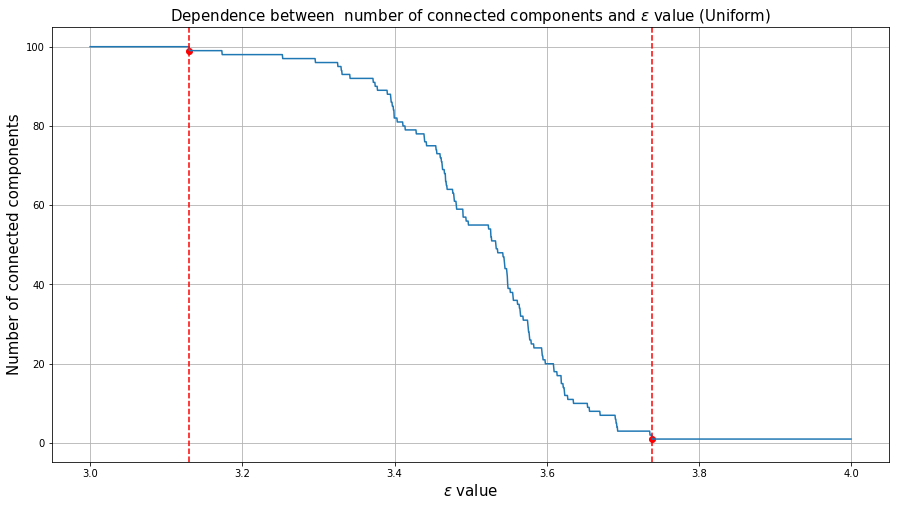

(3.1305000000000436, 3.7385000000002466)

In [1120]:
reload(cw)
cw.Exp2(100, 100, 1, 3, 4, 2000, 'Uniform', True, True)

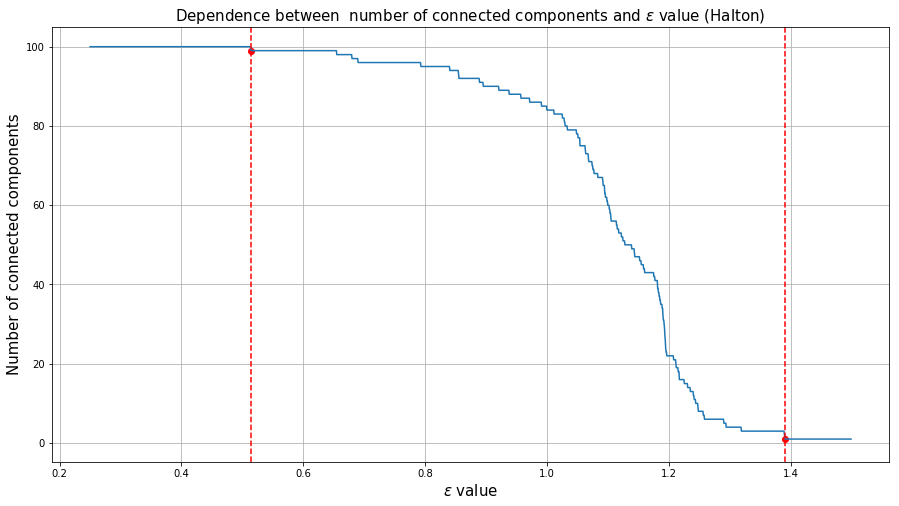

(0.5143749999999944, 1.3912499999999757)

In [1121]:
reload(cw)
cw.Exp2(100, 100, 1, 0.25, 1.5, 2000, 'Halton', True, True)

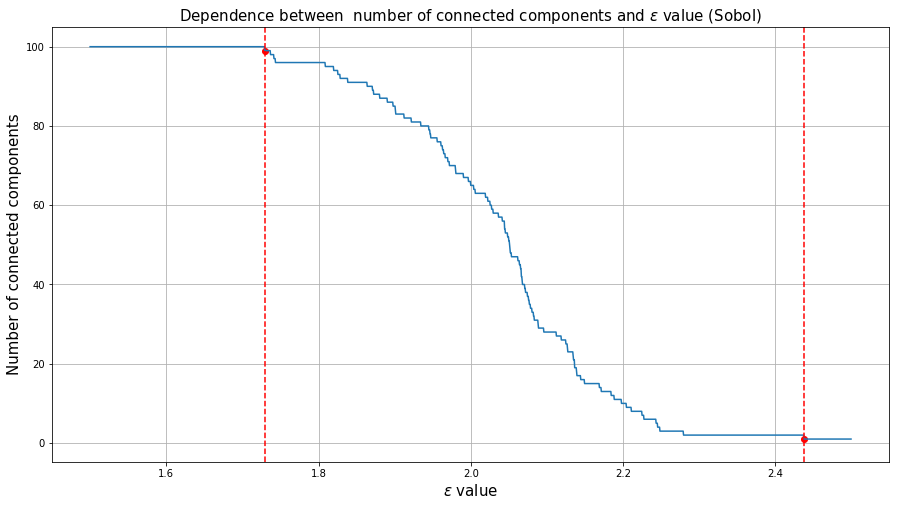

(1.7294999999999747, 2.4379999999998967)

In [1122]:
reload(cw)
cw.Exp2(40, 100, 1, 1.5, 2.5, 2000, 'Sobol', True, True)

## Uniform

In [875]:
diff_epsilons = np.array([])

for i in tqdm(range(500)):
    tuples = cw.Exp2(100, 100, 1, 3, 4, 1000, 'Uniform', False, False)
    diff_epsilons = np.append(diff_epsilons, tuples[1] - tuples[0])
    
diff_epsilons = diff_epsilons[diff_epsilons != None]
mean4 = np.mean(diff_epsilons)
std4 = np.std(diff_epsilons)
var4 = np.var(diff_epsilons)
print('Window width:')
print('Mean =', mean4)
print('Standart deviation =', std4)
print('Variance =', var4)

100%|████████████████████████████████████████| 500/500 [14:15<00:00,  1.71s/it]


Window width:
Mean = 0.6192359999999317
Standart deviation = 0.08789323241295827
Variance = 0.007725220303998298


## Halton

In [913]:
tuples = cw.Exp2(100, 100, 1, 0.5, 1.5, 1000, 'Halton', False, False)
mean2_hol = tuples[1] - tuples[0]
print('Window width:')
print('Mean =', mean2_hol)

Window width:
Mean = 0.8770000000000008


## Sobol

In [877]:
diff_epsilons2 = np.array([])

for i in tqdm(range(500)):
    tuples2 = cw.Exp2(40, 100, 1, 1.5, 2.5, 1000, 'Sobol', False, False)
    diff_epsilons2 = np.append(diff_epsilons2, tuples2[1] - tuples2[0])
    
diff_epsilons2 = diff_epsilons2[diff_epsilons2 != None]
mean5 = np.mean(diff_epsilons2)
std5 = np.std(diff_epsilons2)
var5 = np.var(diff_epsilons2)
print('Window width:')
print('Mean =', mean5)
print('Standart deviation =', std5)
print('Variance =', var5)

100%|████████████████████████████████████████| 500/500 [14:10<00:00,  1.70s/it]


Window width:
Mean = 0.6290519999999308
Standart deviation = 0.09267371415886011
Variance = 0.008588417295998109


# Experiment 3

## Uniform

In [52]:
reload(cw)
k_values = np.array([])

for i in tqdm(range(100)):
    for j in range(2,1000):
        if cw.Exp3(100, j, 1, 3.7, 'Uniform'):
            k_values = np.append(k_values, j)
            break

100%|████████████████████████████████████████| 100/100 [28:55<00:00, 17.36s/it]


In [74]:
mean_val = np.array([])
std_val = np.array([])
var_val = np.array([])

for i in range(500):
    subselection = np.random.choice(k_values, size=50)
    mean_val = np.append(mean_val, np.mean(subselection))
    std_val = np.append(std_val, np.std(subselection))
    var_val = np.append(var_val, np.var(subselection))

k_mean = np.mean(mean_val)
k_std = np.mean(std_val)
k_var = np.mean(var_val)

print('K value:')
print('Bootstrap mean:', k_mean)
print('Bootstrap standart deviation:', k_std)
print('Bootstrap variance:', k_var)

K value:
Bootstrap mean: 120.70576000000001
Bootstrap standart deviation: 55.68512548121798
Bootstrap variance: 3134.5820752


## Halton

In [1052]:
reload(cw)
print('K value')
if cw.Exp3(100, 76, 1, 1.3, 'Halton'):
    print('Mean:', 76)

K value
Mean: 76


## Sobol

In [1136]:
reload(cw)
k_values = np.array([])

for i in tqdm(range(50)):
    for j in range(50,1000):
        if cw.Exp3(40, j, 1, 2.25, 'Sobol'):
            k_values = np.append(k_values, j)
            break

100%|██████████████████████████████████████████| 50/50 [08:01<00:00,  9.64s/it]


In [1137]:
mean_val = np.array([])
std_val = np.array([])
var_val = np.array([])

for i in range(500):
    subselection = np.random.choice(k_values, size=50)
    mean_val = np.append(mean_val, np.mean(subselection))
    std_val = np.append(std_val, np.std(subselection))
    var_val = np.append(var_val, np.var(subselection))

k_mean = np.mean(mean_val)
k_std = np.mean(std_val)
k_var = np.mean(var_val)

print('K value:')
print('Bootstrap mean:', k_mean)
print('Bootstrap standart deviation:', k_std)
print('Bootstrap variance:', k_var)

K value:
Bootstrap mean: 102.35267999999999
Bootstrap standart deviation: 10.561649535062777
Bootstrap variance: 115.62209519999999


# Experiment 4

## Uniform

In [1096]:
reload(cw)
first = np.array([]) 
second = np.array([])
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])

for i in tqdm(range(500)):
    new_matrix = cw.Exp4(100, 100, 1, 3.6, 4, 1000, 'Uniform')
    eigenvalues = np.linalg.eigvals(new_matrix)
    eigenvalues = np.sort(eigenvalues)
    all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
    first = np.append(first, eigenvalues[-1])
    second = np.append(second, eigenvalues[-2])
    eigenvalues = eigenvalues[:-1]
    nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)

100%|████████████████████████████████████████| 500/500 [07:56<00:00,  1.05it/s]


In [1097]:
first_mean = np.mean(first)
first_std = np.std(first)
first_var = np.var(first)

second_mean = np.mean(second)
second_std = np.std(second)
second_var = np.var(second)

print('First eigenvalue mean:', first_mean)
print('First eigenvalue std:', first_std)
print('First eigenvalue var:', first_var)
print('\n')
print('Second eigenvalue mean:', second_mean)
print('Second eigenvalue std:', second_std)
print('Second eigenvalue var:', second_var)

First eigenvalue mean: 19.48856702650183
First eigenvalue std: 5.049513773961568
First eigenvalue var: 25.497589353427596


Second eigenvalue mean: 8.378441086065042
Second eigenvalue std: 0.8629630932548651
Second eigenvalue var: 0.7447053003200049


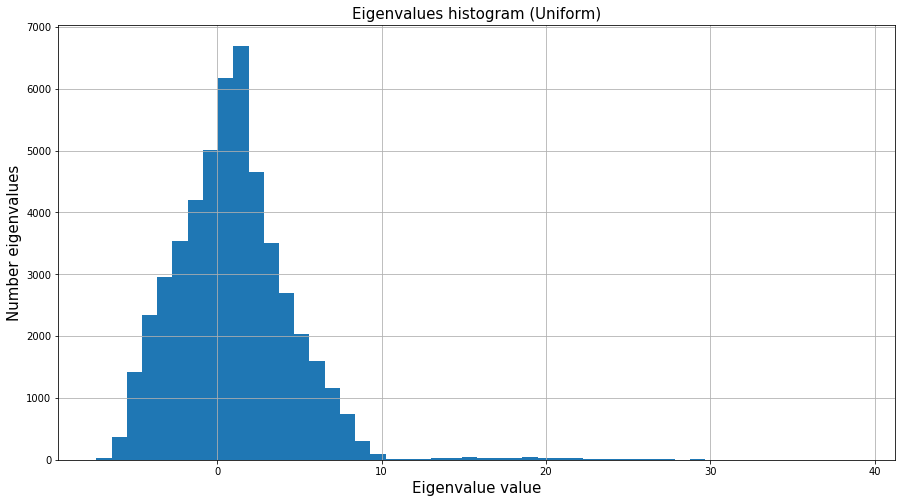

In [1098]:
fig = plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=50)
plt.title('Eigenvalues histogram (Uniform)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_1Uniform.pdf')
pp.savefig(fig)
pp.close()

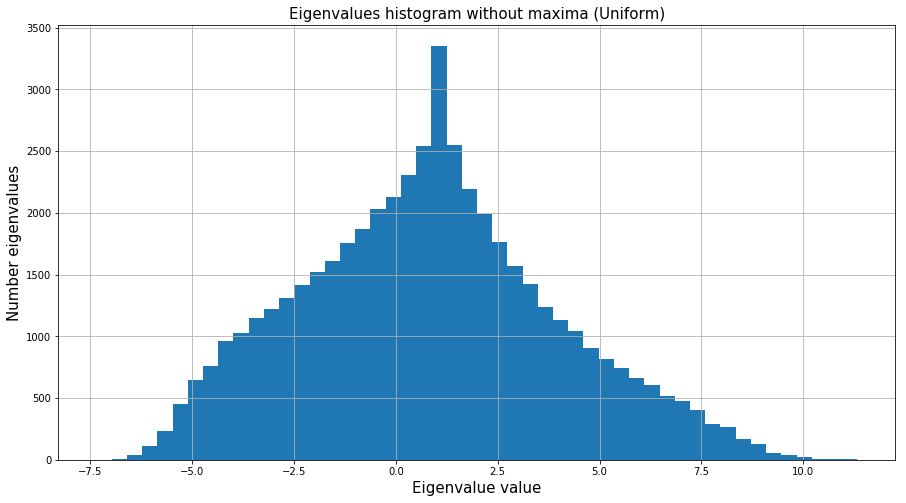

In [1099]:
fig = plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=50)
plt.title('Eigenvalues histogram without maxima (Uniform)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_2Uniform.pdf')
pp.savefig(fig)
pp.close()

## Halton

In [1138]:
reload(cw)
first = np.array([]) 
second = np.array([])
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])


new_matrix = cw.Exp4(100, 100, 1, 1.2, 1.6, 1000, 'Halton')
eigenvalues = np.linalg.eigvals(new_matrix)
eigenvalues = np.sort(eigenvalues)
all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
first = np.append(first, eigenvalues[-1])
second = np.append(second, eigenvalues[-2])
eigenvalues = eigenvalues[:-1]
nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)

In [1139]:
first_mean = np.mean(first)

second_mean = np.mean(second)

print('First eigenvalue mean:', first_mean)
print('Second eigenvalue mean:', second_mean)

First eigenvalue mean: (12.073109870483268+0j)
Second eigenvalue mean: (7.7995380258629+0j)


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\transforms.py:2037: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


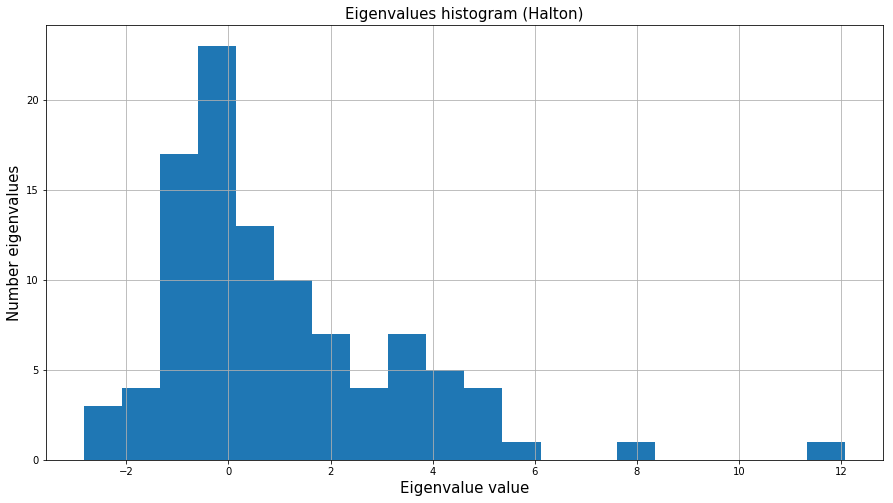

In [1140]:
fig = plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=20)
plt.title('Eigenvalues histogram (Halton)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_1Halton.pdf')
pp.savefig(fig)
pp.close()

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\matplotlib\transforms.py:2037: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


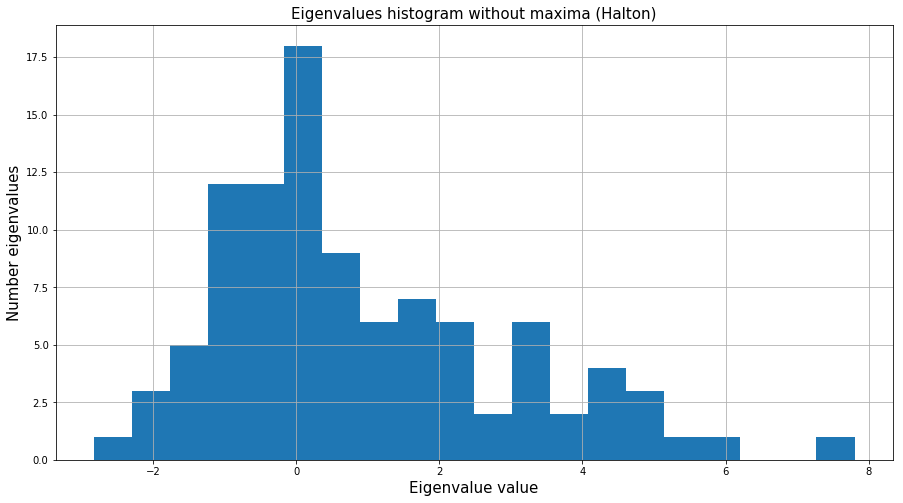

In [1141]:
fig = plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=20)
plt.title('Eigenvalues histogram without maxima (Halton)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_2Halton.pdf')
pp.savefig(fig)
pp.close()

## Sobol

In [1090]:
reload(cw)
first = np.array([]) 
second = np.array([])
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])

for i in tqdm(range(500)):
    new_matrix = cw.Exp4(40, 100, 1, 2.1, 2.5, 1000, 'Sobol')
    eigenvalues = np.linalg.eigvals(new_matrix)
    eigenvalues = np.sort(eigenvalues)
    all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
    first = np.append(first, eigenvalues[-1])
    second = np.append(second, eigenvalues[-2])
    eigenvalues = eigenvalues[:-1]
    nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)

100%|████████████████████████████████████████| 500/500 [08:45<00:00,  1.05s/it]


In [1093]:
first_mean = np.mean(first)
first_std = np.std(first)
first_var = np.var(first)

second_mean = np.mean(second)
second_std = np.std(second)
second_var = np.var(second)

print('First eigenvalue mean:', first_mean)
print('First eigenvalue std:', first_std)
print('First eigenvalue var:', first_var)
print('\n')
print('Second eigenvalue mean:', second_mean)
print('Second eigenvalue std:', second_std)
print('Second eigenvalue var:', second_var)

First eigenvalue mean: 18.05317079615101
First eigenvalue std: 5.534953698797847
First eigenvalue var: 30.635712447835964


Second eigenvalue mean: 8.011261606328576
Second eigenvalue std: 1.0243153204012054
Second eigenvalue var: 1.049221875608624


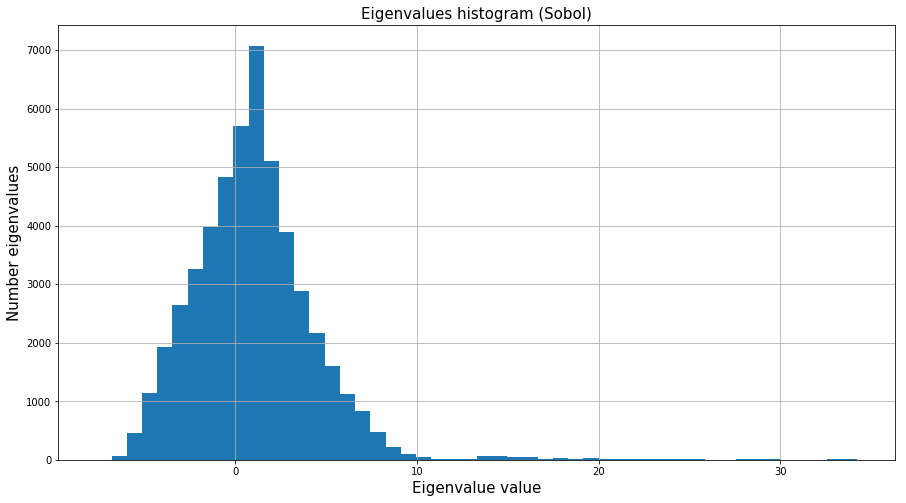

In [1094]:
fig = plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=50)
plt.title('Eigenvalues histogram (Sobol)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_1Sobol.pdf')
pp.savefig(fig)
pp.close()

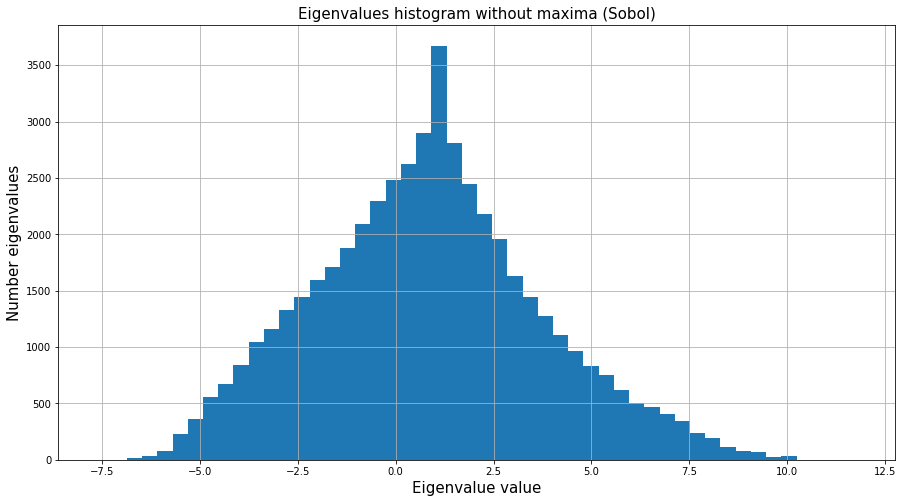

In [1095]:
fig = plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=50)
plt.title('Eigenvalues histogram without maxima (Sobol)', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_2Sobol.pdf')
pp.savefig(fig)
pp.close()

# Experiment 5

## Uniform

In [3]:
reload(cw)
Bettis = np.array([])

for i in tqdm(range(500)):
    Bettis = np.append(Bettis, (cw.Exp5(100, 100, 1, 3.6, 4, 1000)))

100%|████████████████████████████████████████| 500/500 [18:54<00:00,  2.27s/it]


In [4]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
std6 = np.std(Bettis_none)
var6 = np.var(Bettis_none)
print('Betti Mean =', mean6)
print('Betti Standart deviation =', std6)
print('Betti Variance =', var6)

Betti Mean = 1774.59
Betti Standart deviation = 141.52590540250924
Betti Variance = 20029.581899999997


## Halton

In [1107]:
reload(cw)
Bettis = np.array([])

for i in tqdm(range(1)):
    Bettis = np.append(Bettis, (cw.Exp5(100, 100, 1, 1.2, 1.6, 1000, 'Halton')))

100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.64s/it]


In [1108]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
print('Betti Mean =', mean6)

Betti Mean = 361.0


## Sobol

In [1109]:
reload(cw)
Bettis = np.array([])

for i in tqdm(range(500)):
    Bettis = np.append(Bettis, (cw.Exp5(40, 100, 1, 2.1, 2.5, 1000, 'Sobol')))

100%|████████████████████████████████████████| 500/500 [19:33<00:00,  2.35s/it]


In [1110]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
std6 = np.std(Bettis_none)
var6 = np.var(Bettis_none)
print('Betti Mean =', mean6)
print('Betti Standart deviation =', std6)
print('Betti Variance =', var6)

Betti Mean = 1656.5891783567133
Betti Standart deviation = 39.03717927640225
Betti Variance = 1523.901365857969


# Experiment 6

## Uniform

100%|██████████████████████████████████████████| 20/20 [05:45<00:00, 17.27s/it]


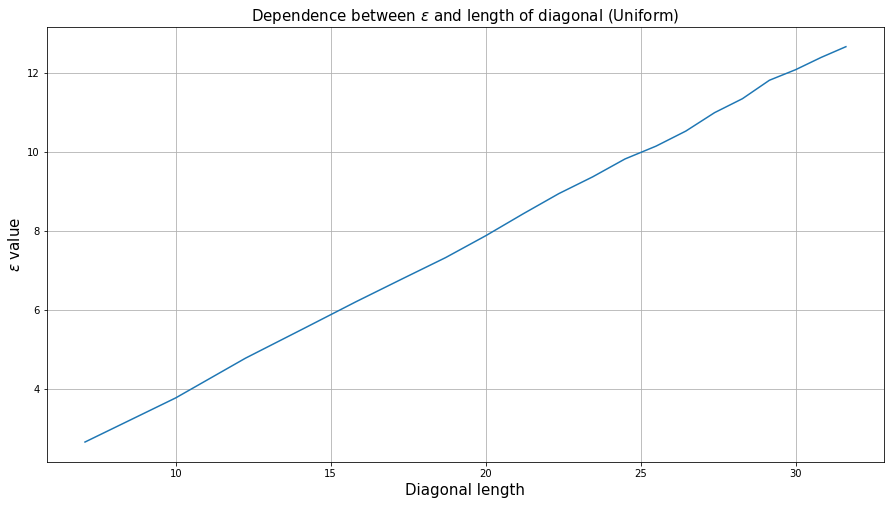

In [1113]:
reload(cw)
n_values = np.arange(50,1050,50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 1*n/100, 20*n/100, 2000, 'Uniform', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Dependence between $\epsilon$ and length of diagonal (Uniform)', size=15)
plt.xlabel('Diagonal length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_1Uniform.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 20/20 [02:08<00:00,  6.41s/it]


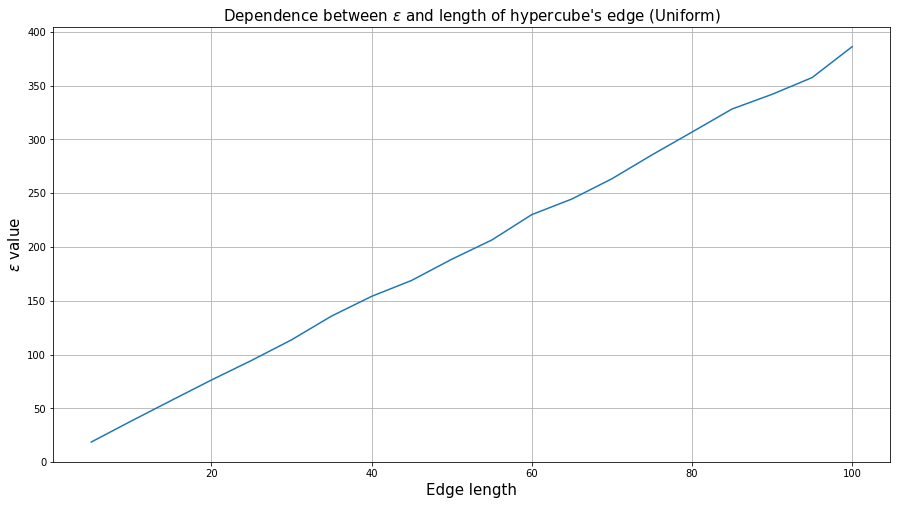

In [1114]:
reload(cw)
a_values = np.arange(5,105,5)

eps_values = np.array([])

for a in tqdm(a_values):
    test = cw.Exp1(100, 100, a, 1*a, 10*a, 1000, 'Uniform', False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title("Dependence between $\epsilon$ and length of hypercube's edge (Uniform)", size=15)
plt.xlabel('Edge length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_2Uniform.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 40/40 [05:43<00:00,  8.59s/it]


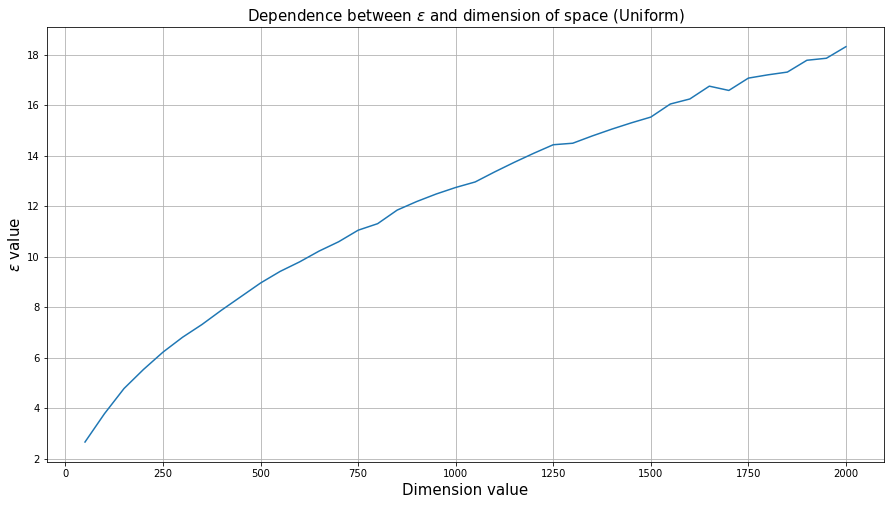

In [1115]:
reload(cw)
n_values = np.arange(50, 2050, 50)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 0.1*n/100, 20*n/100, 1000, 'Uniform', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Dependence between $\epsilon$ and dimension of space (Uniform)', size=15)
plt.xlabel('Dimension value', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_3Uniform.pdf')
pp.savefig(fig)
pp.close()

## Holton

100%|██████████████████████████████████████████| 20/20 [03:52<00:00, 11.62s/it]


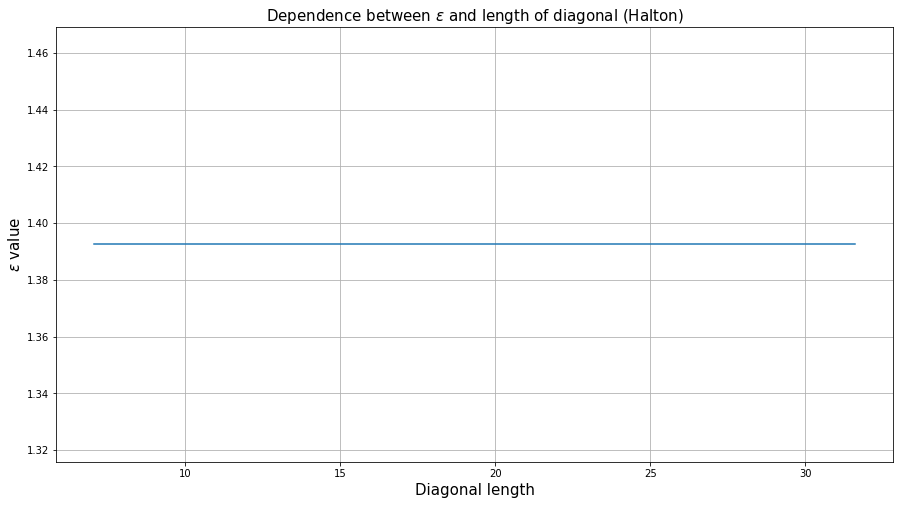

In [1148]:
reload(cw)
n_values = np.arange(50,1050,50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 0, 5, 2000, 'Halton', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Dependence between $\epsilon$ and length of diagonal (Halton)', size=15)
plt.xlabel('Diagonal length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_1Halton.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 25/25 [03:26<00:00,  8.25s/it]


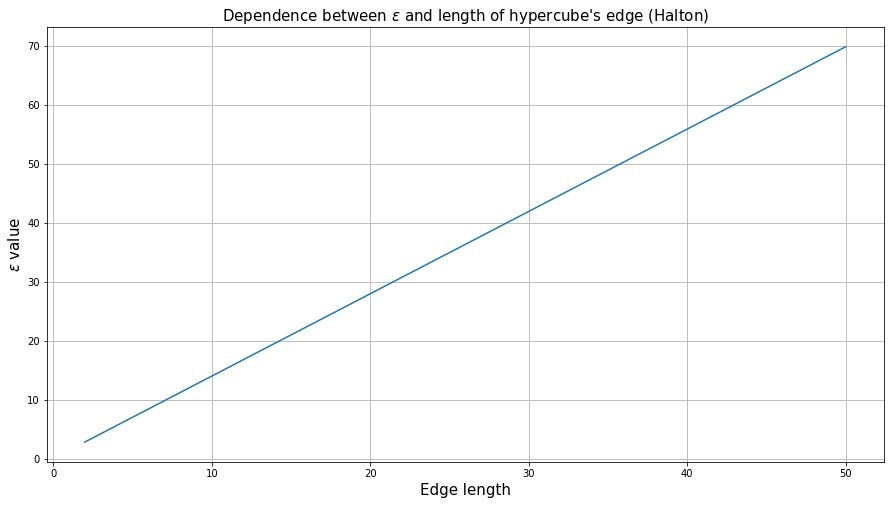

In [1161]:
reload(cw)
a_values = np.arange(2,52,2)

eps_values = np.array([])

for a in tqdm(a_values):
    test = cw.Exp1(100, 100, a, 1*a, 10*a, 1000, 'Halton', False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title("Dependence between $\epsilon$ and length of hypercube's edge (Halton)", size=15)
plt.xlabel('Edge length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_2Halton.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 20/20 [03:10<00:00,  9.51s/it]


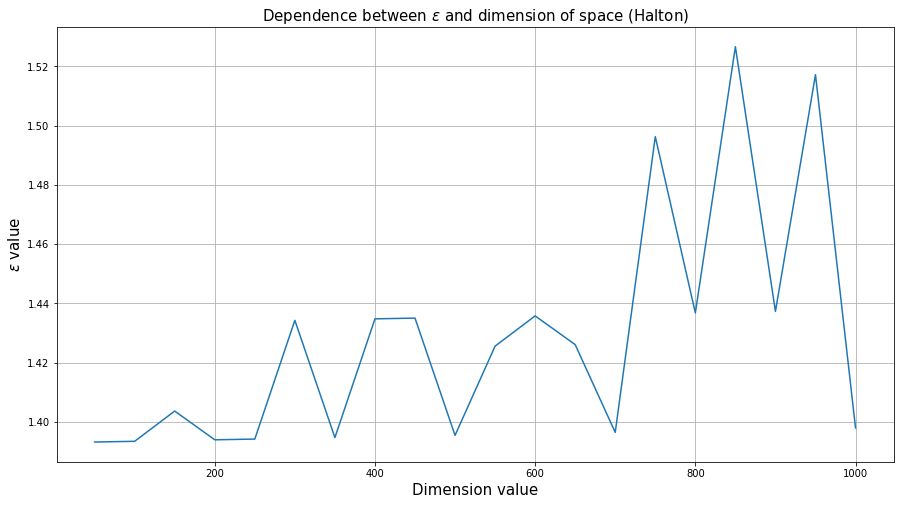

In [1166]:
reload(cw)
n_values = np.arange(50, 1050, 50)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, n/1000, n/5, 1000, 'Halton', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Dependence between $\epsilon$ and dimension of space (Halton)', size=15)
plt.xlabel('Dimension value', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_3Halton.pdf')
pp.savefig(fig)
pp.close()

## Sobol

100%|██████████████████████████████████████████| 20/20 [03:30<00:00, 10.54s/it]


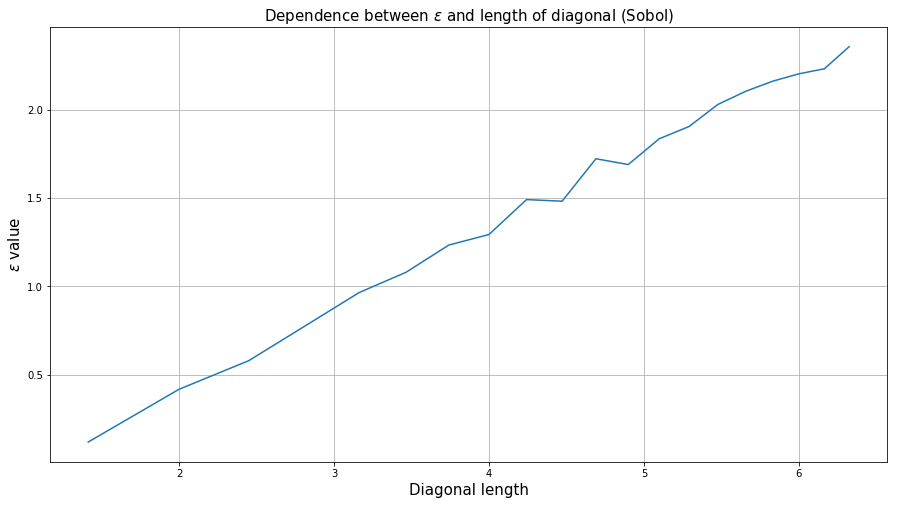

In [1168]:
reload(cw)
n_values = np.arange(2,42,2)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 1*n/100, 20*n/100, 2000, 'Sobol', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Dependence between $\epsilon$ and length of diagonal (Sobol)', size=15)
plt.xlabel('Diagonal length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_1Sobol.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 20/20 [02:49<00:00,  8.47s/it]


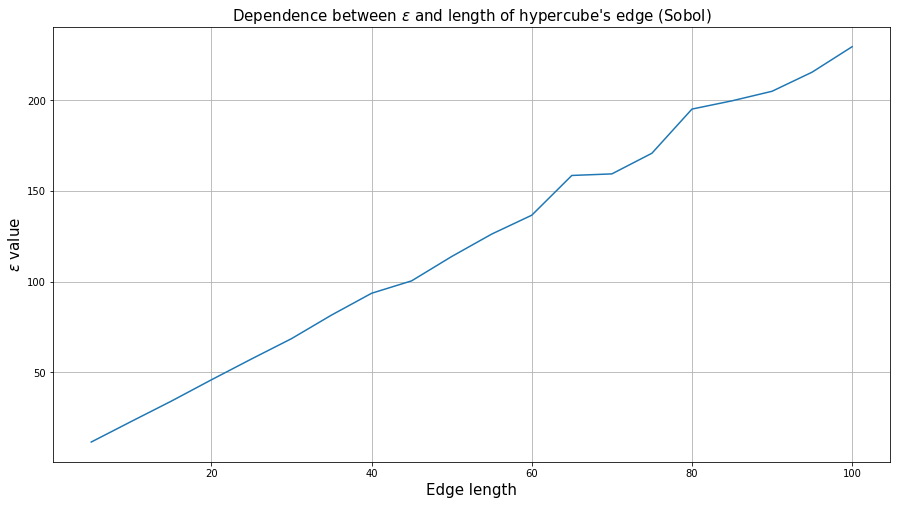

In [1170]:
reload(cw)
a_values = np.arange(5,105,5)

eps_values = np.array([])

for a in tqdm(a_values):
    test = cw.Exp1(40, 100, a, 1*a, 10*a, 1000, 'Sobol', False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title("Dependence between $\epsilon$ and length of hypercube's edge (Sobol)", size=15)
plt.xlabel('Edge length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_2Sobol.pdf')
pp.savefig(fig)
pp.close()


  5%|██▏                                        | 1/20 [00:02<00:44,  2.35s/it]
Exception in thread Thread-109:
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python36\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "c:\users\asus\appdata\local\programs\python\python36\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████████████████████████████████████| 20/20 [01:41<00:00,  5.10s/it]


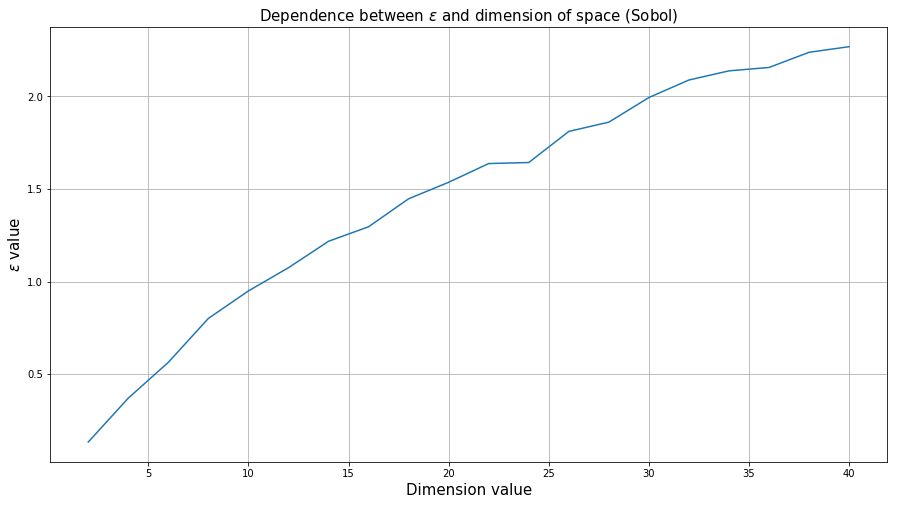

In [1173]:
reload(cw)
n_values = np.arange(2, 42, 2)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 0.1*n/100, 20*n/100, 1000, 'Sobol', False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Dependence between $\epsilon$ and dimension of space (Sobol)', size=15)
plt.xlabel('Dimension value', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp6_3Sobol.pdf')
pp.savefig(fig)
pp.close()

# Experiment 7


## Uniform

In [1177]:
def takeDegree(elem):
    return elem[1]

def degrees(G):
    ND = list(G.degree()) 
    D = []
    for i in range(len(ND)):
        D.append(takeDegree(ND[i]))
    return D

In [1178]:
degree = []

for _ in tqdm(range(500)):
    new_matrix = cw.Exp4(100, 100, 1, 3.6, 4, 1000, 'Uniform')
    if type(new_matrix) != type(None):
        graph = nx.from_numpy_matrix(new_matrix)
        degree.extend(degrees(graph))

100%|████████████████████████████████████████| 500/500 [08:12<00:00,  1.01it/s]


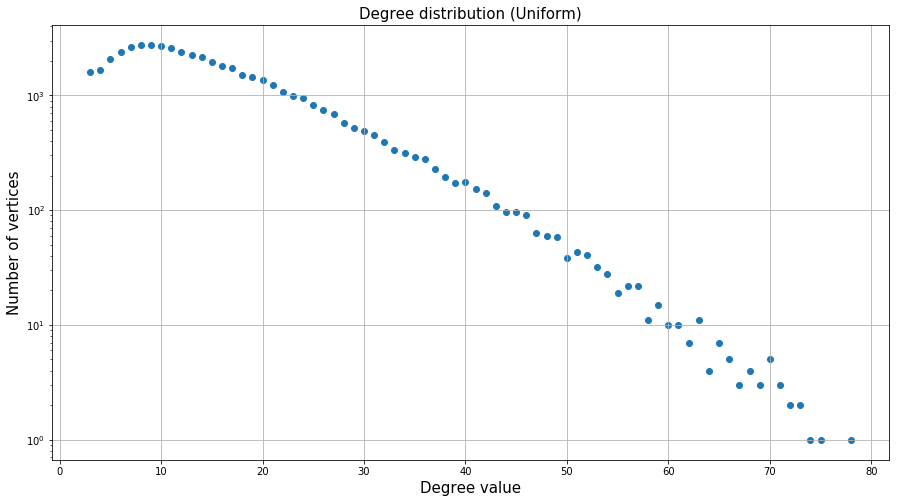

In [1179]:
vertex_dict = Counter(degree)
vertex_dict = dict(vertex_dict)
vertex_pairs = vertex_dict.items()
vertex_list = np.array(list(vertex_pairs))

fig = plt.figure(figsize=(15, 8))
plt.scatter(vertex_list[:,0],vertex_list[:,1])
plt.yscale('log')
plt.title('Degree distribution (Uniform)', size=15)
plt.xlabel('Degree value', size=15)
plt.ylabel('Number of vertices', size=15)
plt.grid()
pp = PdfPages('CWExp7Uniform.pdf')
pp.savefig(fig)
pp.close()

## Halton

In [1180]:
degree = []

new_matrix = cw.Exp4(100, 100, 1, 1.2, 1.6, 1000, 'Halton')
if type(new_matrix) != type(None):
    graph = nx.from_numpy_matrix(new_matrix)
    degree.extend(degrees(graph))

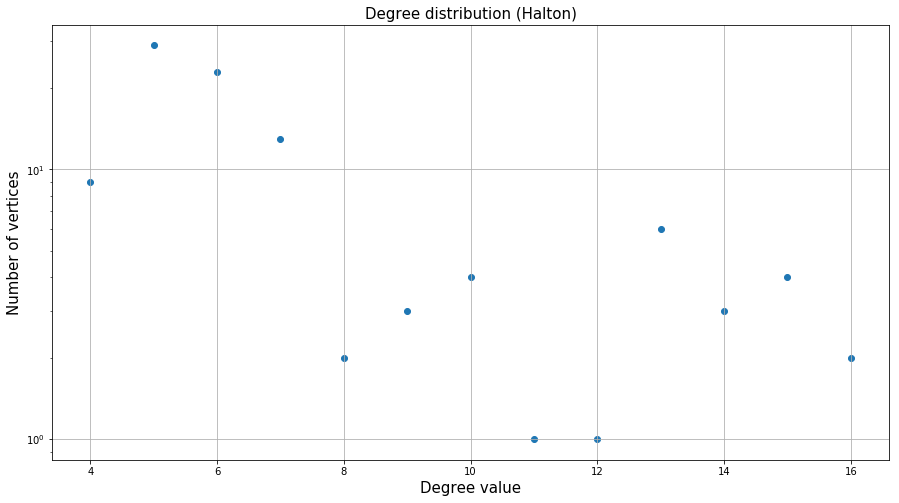

In [1181]:
vertex_dict = Counter(degree)
vertex_dict = dict(vertex_dict)
vertex_pairs = vertex_dict.items()
vertex_list = np.array(list(vertex_pairs))

fig = plt.figure(figsize=(15, 8))
plt.scatter(vertex_list[:,0],vertex_list[:,1])
plt.yscale('log')
plt.title('Degree distribution (Halton)', size=15)
plt.xlabel('Degree value', size=15)
plt.ylabel('Number of vertices', size=15)
plt.grid()
pp = PdfPages('CWExp7Halton.pdf')
pp.savefig(fig)
pp.close()

## Sobol

In [1184]:
degree = []

for _ in tqdm(range(500)):
    new_matrix = cw.Exp4(40, 100, 1, 2.1, 2.5, 1000, 'Sobol')
    if type(new_matrix) != type(None):
        graph = nx.from_numpy_matrix(new_matrix)
        degree.extend(degrees(graph))

100%|████████████████████████████████████████| 500/500 [08:16<00:00,  1.01it/s]


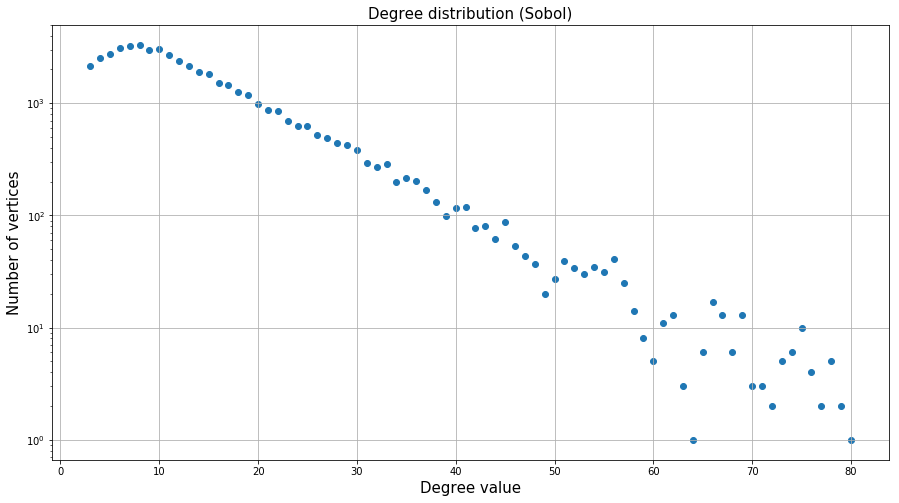

In [1185]:
vertex_dict = Counter(degree)
vertex_dict = dict(vertex_dict)
vertex_pairs = vertex_dict.items()
vertex_list = np.array(list(vertex_pairs))

fig = plt.figure(figsize=(15, 8))
plt.scatter(vertex_list[:,0],vertex_list[:,1])
plt.yscale('log')
plt.title('Degree distribution (Sobol)', size=15)
plt.xlabel('Degree value', size=15)
plt.ylabel('Number of vertices', size=15)
plt.grid()
pp = PdfPages('CWExp7Sobol.pdf')
pp.savefig(fig)
pp.close()

# FIN

In [1197]:
reload(cw)
test1 = cw.DotsCoordinates(2,500,1,'Uniform')
test2 = cw.DotsCoordinates(2,500,1,'Halton')
test3 = cw.DotsCoordinates(2,500,1,'Sobol')

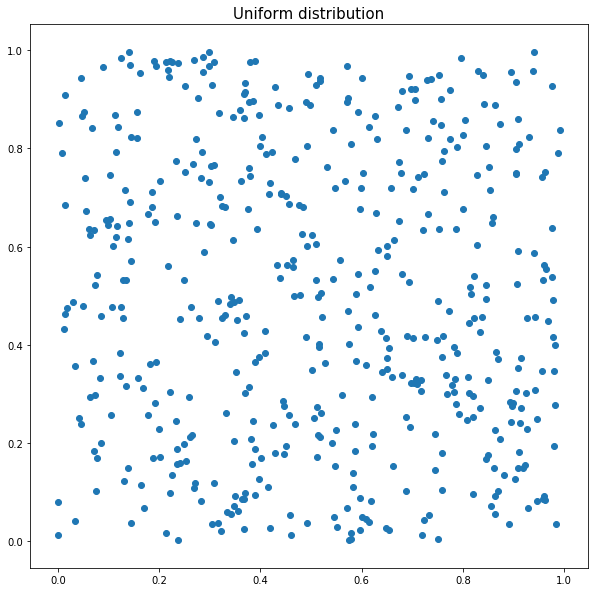

In [1203]:
fig = plt.figure(figsize=(10,10))
plt.title('Uniform distribution', size=15)
plt.scatter(test1[:,0],test1[:,1])
pp = PdfPages('CWUniform.pdf')
pp.savefig(fig)
pp.close()

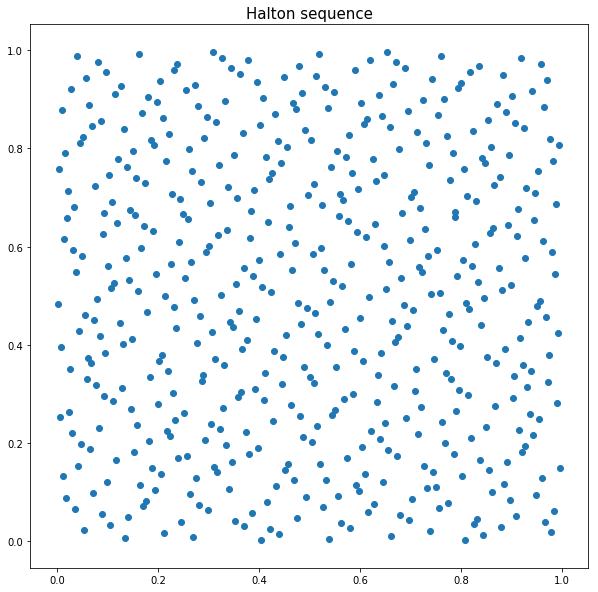

In [1206]:
fig = plt.figure(figsize=(10,10))
plt.title('Halton sequence', size=15)
plt.scatter(test2[:,0],test2[:,1])
pp = PdfPages('CWHalton.pdf')
pp.savefig(fig)
pp.close()

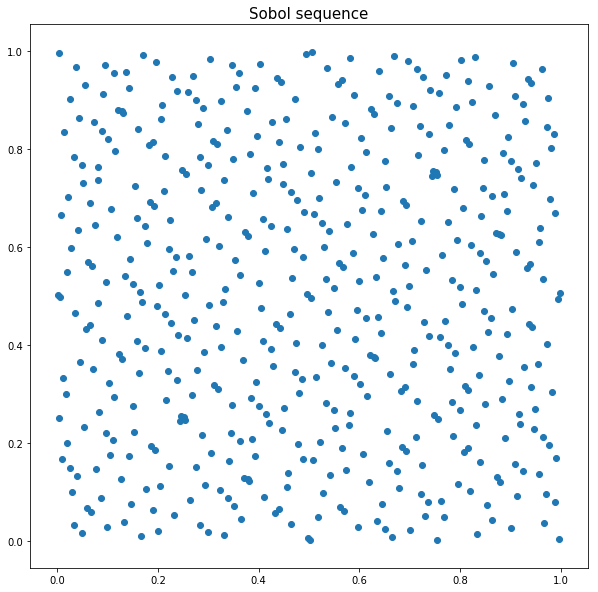

In [1208]:
fig = plt.figure(figsize=(10,10))
plt.title('Sobol sequence', size=15)
plt.scatter(test3[:,0],test3[:,1])
pp = PdfPages('CWSobol.pdf')
pp.savefig(fig)
pp.close()